# LHC Optics toolkit with Xsuite (R. De Maria, G. Iadarola)

## Introduction
- In the last 20+ years LHC  optics works was based on a set of script and macros, mostly in MAD-X (but also a bit of Fortran and Python) hosted in the `toolkit` directory of the optics repository. Developers typically completed the scripts with other personal code.
- Personally, I have collected my scripts and utilities in the package `pyoptics` over the last 20 years.
- Since about a year  Xsuite has been capable to twiss and match LHC and HL-LHC optics similarly when not better to MAD-X.
- Good occasion to restructure toolkit around Xsuite with a concrete target of the preparations of LHC MDs. 

## Context

Building optics is both an interactive process, more like editing and sculpting beta functions and transitions, coupled with a large set of setup script to generate models for operations.

MAD-X does not allow rich data structure and control flow, limiting the abstractions and automatization and encouraging cut&paste scripts on interactive prompts.

Python still allows this style, but at the same time offers rich data structures and control flow, an enormous number of libraries and tools. Given Xsuite is pure Python the integration in the ecosystem is seamless and allows reducing development time.

The approach for this new toolkit, was to avoid cut&paste work flow and perform all editing and scripting needs through data structures and methods.

I will present using this notebook, but I normally use ipython for interactive work and mscode for code editing. This gives me interactive plots and automatic reload of code.


## Architecture

Main classes:
- `LHC`: Access optics repositories and models
- `LHCOptics`: Contains an optics: strengths, parameters, knobs, sections, reference to models and main methods
- `LHCIR1`,...,`LHCIR1`,`LHCArc`: Contains specific strengths, parameters, knobs that can be associated to a section
- `LHCXsuiteModel`: Contain an Xsuite model and tools to extract or load optics
- `LHCMadxModel`: Contain a Madx model and tools to extract or load optics, useful for loading existing optics and testing new optics
- `LHCCircuitModel`: Contain a model of LHC circuits: transfer functions, current limits, circuit parameters used in matching
- `LHCApertureModel`: Contain a model of the LHC apertures.

Code is available in https://github.com/rdemaria/lhcoptics and package can be installed using `pip install lhcoptics`, but bleeding edge not there yet!

Code is about 50% completed, enough to put an optics cycle in the machine, but still some essential features are missing. ETA: end of year. 

## Optics

In [1]:
from lhcoptics import LHCOptics

In [2]:
opt=LHCOptics.from_json("squeezevh/v2/squeeze_0_knobs.json")

In [3]:
opt

<LHCOptics 'squeezevh_0'>

In [4]:
opt.params

{'p0c': 6800000000000.0,
 'qxb1': 62.3100000014583,
 'qyb1': 60.31999999235994,
 'qxb2': 62.309999995378064,
 'qyb2': 60.319999993312145,
 'qpxb1': -2.441424840071704e-07,
 'qpyb1': 0.0,
 'qpxb2': -7.218403652586858e-07,
 'qpyb2': 0.0,
 'match_inj': False,
 'rx_ip1': 1,
 'ry_ip1': 1,
 'rx_ip5': 1,
 'ry_ip5': 1}

In [5]:
opt.knobs

{'dqx.b1_op': TuneKnob('dqx.b1_op', 0),
 'dqx.b1_sq': TuneKnob('dqx.b1_sq', 0),
 'dqx.b1': TuneKnob('dqx.b1', 0),
 'dqx.b2_op': TuneKnob('dqx.b2_op', 0),
 'dqx.b2_sq': TuneKnob('dqx.b2_sq', 0),
 'dqx.b2': TuneKnob('dqx.b2', 0),
 'dqy.b1_op': TuneKnob('dqy.b1_op', 0),
 'dqy.b1_sq': TuneKnob('dqy.b1_sq', 0),
 'dqy.b1': TuneKnob('dqy.b1', 0),
 'dqy.b2_op': TuneKnob('dqy.b2_op', 0),
 'dqy.b2_sq': TuneKnob('dqy.b2_sq', 0),
 'dqy.b2': TuneKnob('dqy.b2', 0),
 'dqpx.b1_op': ChromaKnob('dqpx.b1_op', 0),
 'dqpx.b1_sq': ChromaKnob('dqpx.b1_sq', 0),
 'dqpx.b1': ChromaKnob('dqpx.b1', 0),
 'dqpx.b2_op': ChromaKnob('dqpx.b2_op', 0),
 'dqpx.b2_sq': ChromaKnob('dqpx.b2_sq', 0),
 'dqpx.b2': ChromaKnob('dqpx.b2', 0),
 'dqpy.b1_op': ChromaKnob('dqpy.b1_op', 0),
 'dqpy.b1_sq': ChromaKnob('dqpy.b1_sq', 0),
 'dqpy.b1': ChromaKnob('dqpy.b1', 0),
 'dqpy.b2_op': ChromaKnob('dqpy.b2_op', 0),
 'dqpy.b2_sq': ChromaKnob('dqpy.b2_sq', 0),
 'dqpy.b2': ChromaKnob('dqpy.b2', 0),
 'cmis.b1_op': CouplingKnob('cmis.b1_op'

In [6]:
opt.irs

[<LHCIR1 in 'squeezevh_0'>,
 <LHCIR2 in 'squeezevh_0'>,
 <LHCIR3 in 'squeezevh_0'>,
 <LHCIR4 in 'squeezevh_0'>,
 <LHCIR5 in 'squeezevh_0'>,
 <LHCIR6 in 'squeezevh_0'>,
 <LHCIR7 in 'squeezevh_0'>,
 <LHCIR8 in 'squeezevh_0'>]

In [7]:
opt.arcs

[<LHCArc a12 in 'squeezevh_0'>,
 <LHCArc a23 in 'squeezevh_0'>,
 <LHCArc a34 in 'squeezevh_0'>,
 <LHCArc a45 in 'squeezevh_0'>,
 <LHCArc a56 in 'squeezevh_0'>,
 <LHCArc a67 in 'squeezevh_0'>,
 <LHCArc a78 in 'squeezevh_0'>,
 <LHCArc a81 in 'squeezevh_0'>]

In [8]:
opt.ir1.strengths

{'kqx.l1': 0.008496131499484852,
 'kqx.r1': -0.008496131499484852,
 'ktqx1.l1': -6.8898984230114635e-06,
 'ktqx1.r1': 6.8898984230114635e-06,
 'ktqx2.l1': 0.00031495275301261945,
 'ktqx2.r1': -0.00031495275301261945,
 'kq4.l1b1': 0.0,
 'kq4.l1b2': 0.0,
 'kq4.r1b1': 0.0,
 'kq4.r1b2': 0.0,
 'kq5.l1b1': -0.004059373776275848,
 'kq5.l1b2': 0.0038986861854921487,
 'kq5.r1b1': 0.004031721163958264,
 'kq5.r1b2': -0.003949943413340483,
 'kq6.l1b1': 0.005314951709321084,
 'kq6.l1b2': -0.00532495649271619,
 'kq6.r1b1': -0.005323231194886783,
 'kq6.r1b2': 0.005380043537187969,
 'kq7.l1b1': -0.006084901558911206,
 'kq7.l1b2': 0.006062762870952789,
 'kq7.r1b1': 0.006055273041905767,
 'kq7.r1b2': -0.006096184601159193,
 'kq8.l1b1': 0.00705312947264139,
 'kq8.l1b2': -0.006753339123237782,
 'kq8.r1b1': -0.007018479892425734,
 'kq8.r1b2': 0.006746484495141906,
 'kq9.l1b1': -0.007095065807276826,
 'kq9.l1b2': 0.006823778361561372,
 'kq9.r1b1': 0.006770842774689588,
 'kq9.r1b2': -0.006453682846573191,
 '

In [9]:
opt.ir1.quads

{'kqx.l1': 0.008496131499484852,
 'kqx.r1': -0.008496131499484852,
 'ktqx1.l1': -6.8898984230114635e-06,
 'ktqx1.r1': 6.8898984230114635e-06,
 'ktqx2.l1': 0.00031495275301261945,
 'ktqx2.r1': -0.00031495275301261945,
 'kq5.l1b1': -0.004059373776275848,
 'kq5.l1b2': 0.0038986861854921487,
 'kq5.r1b1': 0.004031721163958264,
 'kq5.r1b2': -0.003949943413340483,
 'kq6.l1b1': 0.005314951709321084,
 'kq6.l1b2': -0.00532495649271619,
 'kq6.r1b1': -0.005323231194886783,
 'kq6.r1b2': 0.005380043537187969,
 'kq7.l1b1': -0.006084901558911206,
 'kq7.l1b2': 0.006062762870952789,
 'kq7.r1b1': 0.006055273041905767,
 'kq7.r1b2': -0.006096184601159193,
 'kq8.l1b1': 0.00705312947264139,
 'kq8.l1b2': -0.006753339123237782,
 'kq8.r1b1': -0.007018479892425734,
 'kq8.r1b2': 0.006746484495141906,
 'kq9.l1b1': -0.007095065807276826,
 'kq9.l1b2': 0.006823778361561372,
 'kq9.r1b1': 0.006770842774689588,
 'kq9.r1b2': -0.006453682846573191,
 'kq10.l1b1': 0.007165666971541371,
 'kq10.l1b2': -0.007065682336111915,
 

## Xsuite Model

In [10]:
opt.set_xsuite_model("acc-models-lhc/xsuite/lhc.json")

Loading line from dict:   0%|          | 0/14477 [00:00<?, ?it/s]

Done loading line from dict.           


Loading line from dict:   0%|          | 0/14493 [00:00<?, ?it/s]

Done loading line from dict.           


<LHCOptics 'squeezevh_0'>

<LHCOptics 'squeezevh_0'>

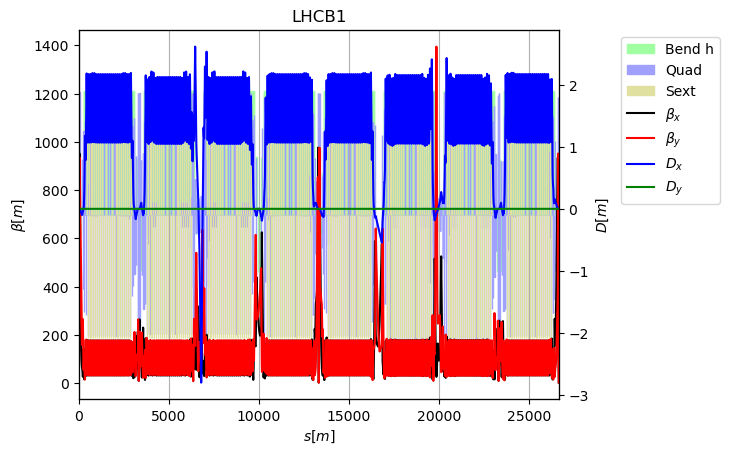

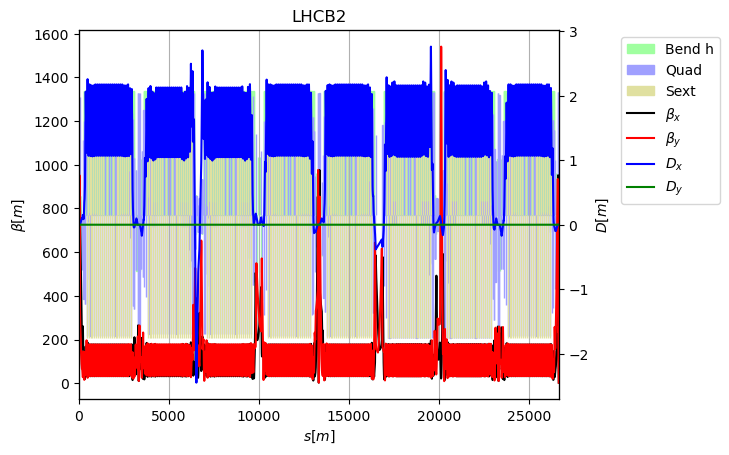

In [11]:
opt.plot()

In [12]:
opt.model["kqx.l1"]*=1.01

<LHCOptics 'squeezevh_0'>

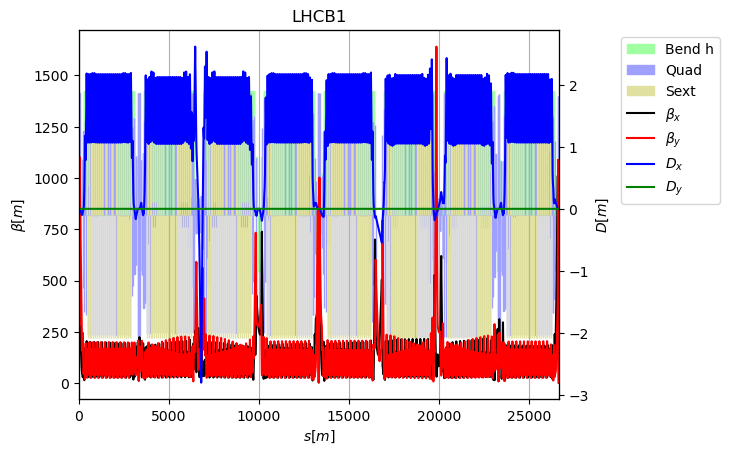

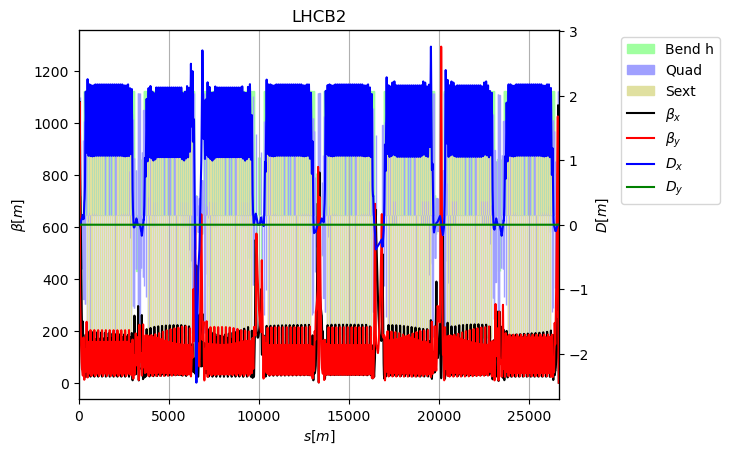

In [13]:
opt.plot()

In [14]:
opt.update_model() # restore the model from the optics!

<LHCOptics 'squeezevh_0'>

<LHCOptics 'squeezevh_0'>

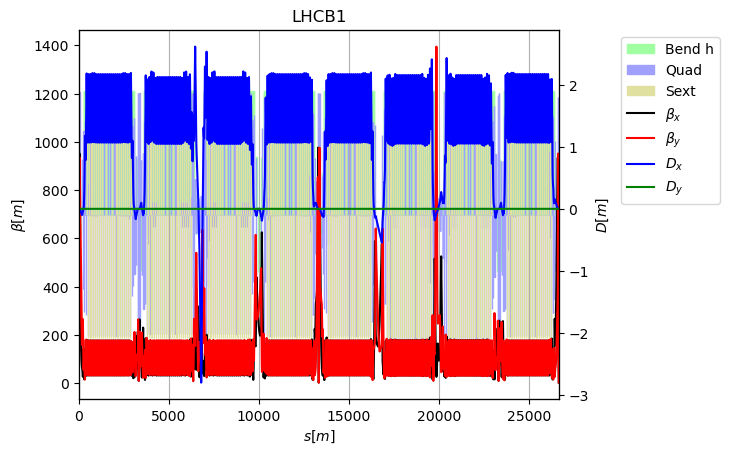

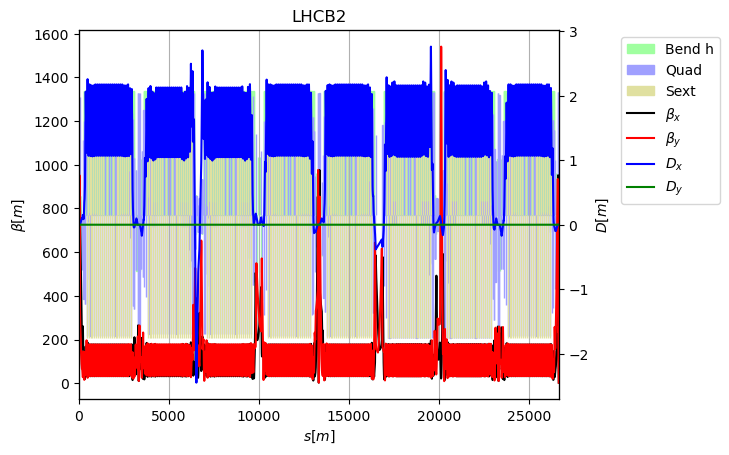

In [15]:
opt.plot()

In [16]:
opt.check()

name    betx    bety      dx     dpx  px*1e6  py*1e6   x*1e3   y*1e3
ip1   2.5000  2.5000  0.0000  0.0000  0.0000 -0.0000 -0.0000  0.0000
ip1   2.5000  2.5000 -0.0000  0.0000 -0.0000  0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000 -0.0000 -0.0000 -0.0000  0.0000  0.0000  0.0000
ip5   2.5000  2.5000  0.0000 -0.0000 -0.0000  0.0000 -0.0000 -0.0000
ip5   2.5000  2.5000  0.0000  0.0000 -0.0000  0.0000 -0.0000 -0.0000
ip8  10.0000 10.0000 -0.0000  0.0000  0.0000 -0.0000 -0.0000 -0.0000
ip8  10.0000 10.0000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000
         HB1         HB2         VB1         VB2
Tunes:    62.310000   62.310000   60.320000   60.320000
Chroma:   -0.000000   -0.000001    0.000000    0.000000


In [17]:
opt.model.b1 # an xsuite object

In [18]:
opt.model.b1.twiss().rows["ip.*"].cols["betx bety"]

TwissTable: 9 rows, 3 cols
name            betx          bety
ip1              2.5           2.5
ip2               10            10
ip3          125.612        87.627
ip4           236.18       306.197
ip5              2.5           2.5
ip6          188.438        175.63
ip7          94.2582       251.258
ip8               10            10
ip1.l1           2.5           2.5

In [19]:
opt.model.b2.twiss().rows["ip.*"].cols["betx bety"]

TwissTable: 9 rows, 3 cols
name            betx          bety
ip1              2.5           2.5
ip2               10            10
ip3          127.193       111.964
ip4          236.148       320.924
ip5              2.5           2.5
ip6          189.334       181.969
ip7          112.842       270.465
ip8               10            10
ip1.l1           2.5           2.5

In [20]:
opt.model.b2.twiss().rows["ip.*"].cols["betx bety dx/sqrt(betx)"]

TwissTable: 9 rows, 4 cols
name            betx          bety dx/sqrt(betx)
ip1              2.5           2.5  -2.53942e-09
ip2               10            10  -1.59509e-09
ip3          127.193       111.964    -0.0512793
ip4          236.148       320.924  -2.40626e-06
ip5              2.5           2.5   8.57871e-10
ip6          189.334       181.969    -0.0221652
ip7          112.842       270.465    0.00845265
ip8               10            10  -1.65971e-09
ip1.l1           2.5           2.5  -1.05961e-10

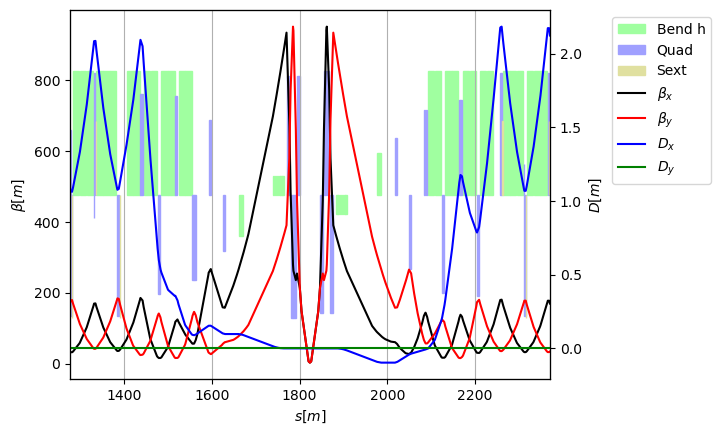

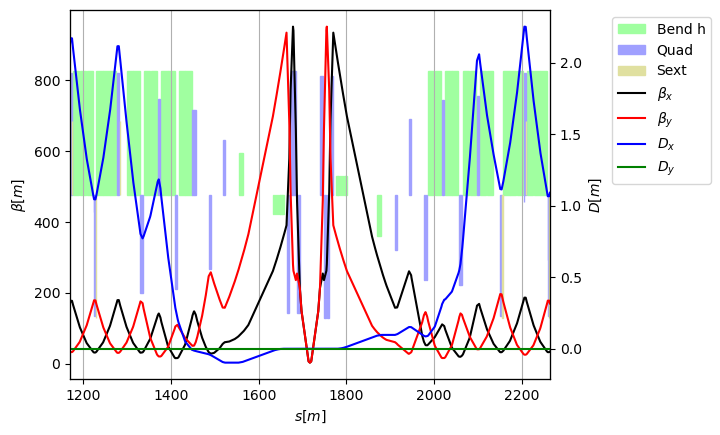

In [21]:
opt.ir1.plot()

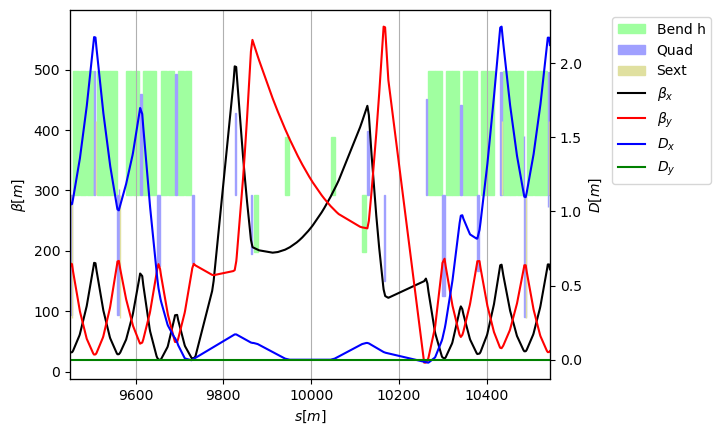

In [22]:
opt.ir4.plot(beam=2)

In [23]:
opt.ir1.knobs['on_sep1_h']

<IPKnob 'on_sep1_h' = 0>

In [24]:
opt.ir1.knobs['on_sep1_h'].weights

{'acbch5.l1b2': -1.371046422067373e-05,
 'acbch5.r1b1': 1.6039772689813456e-05,
 'acbch6.l1b1': -1.9155669684996245e-06,
 'acbch6.r1b2': 2.0747398717201065e-06,
 'acbxh1.l1': 9.145424242533198e-06,
 'acbxh1.r1': 9.158081596395345e-06,
 'acbxh2.l1': 1.1698448545340638e-05,
 'acbxh2.r1': 1.1774535503523277e-05,
 'acbxh3.l1': 4.662779491114475e-06,
 'acbxh3.r1': 4.565308016985104e-06,
 'acbyhs4.l1b1': 1.14376143157755e-05,
 'acbyhs4.l1b2': 8.46503930703532e-06,
 'acbyhs4.r1b1': -1.159472324019039e-05,
 'acbyhs4.r1b2': -1.1719098578938528e-05}

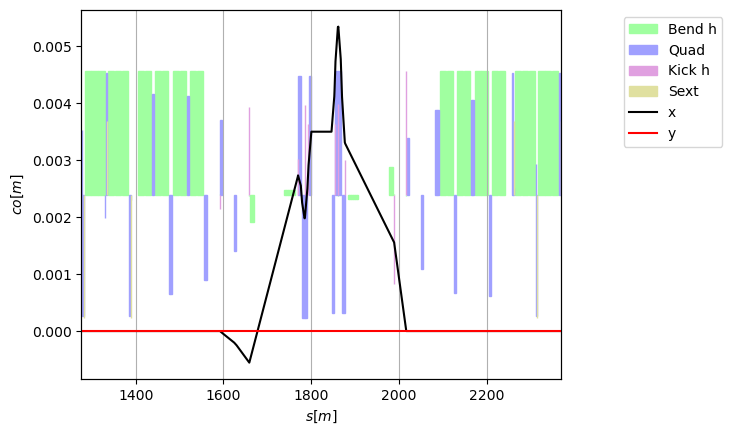

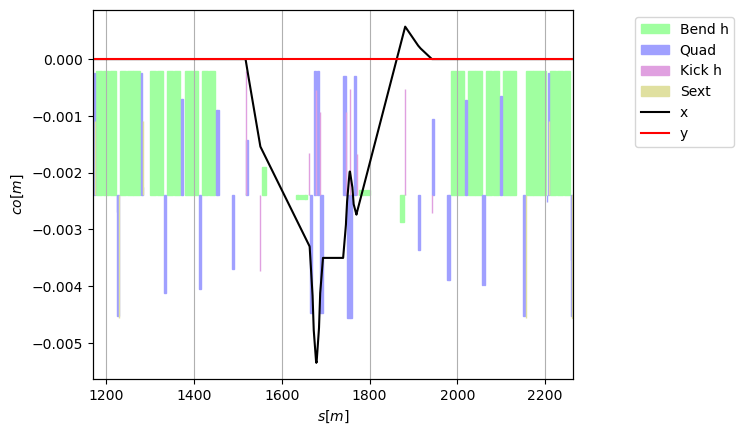

In [25]:
opt.ir1.knobs['on_sep1_h'].plot(3.5)

In [26]:
opt.model.b1["on_sep1_h"]

0

In [27]:
opt.model.b1.vars["on_sep1_h"]._info(limit=None)

#  vars['on_sep1_h']._get_value()
   vars['on_sep1_h'] = 0

#  vars['on_sep1_h']._expr is None

#  vars['on_sep1_h']._find_dependant_targets()
   vars['acbyhs4.l1b2']
   eref['b2']['mcbyh.4l1.b2'].knl[0]
   vars['acbch6.r1b2']
   eref['b2']['mcbch.6r1.b2'].knl[0]
   vars['acbch5.l1b2']
   eref['b2']['mcbch.5l1.b2'].knl[0]
   vars['acbyhs4.r1b1']
   eref['b1']['mcbyh.4r1.b1'].knl[0]
   vars['acbch6.l1b1']
   eref['b1']['mcbch.6l1.b1'].knl[0]
   vars['acbch5.r1b1']
   eref['b1']['mcbch.5r1.b1'].knl[0]
   vars['acbyhs4.r1b2']
   eref['b2']['mcbyh.a4r1.b2'].knl[0]
   vars['acbyhs4.l1b1']
   eref['b1']['mcbyh.a4l1.b1'].knl[0]
   vars['acbxh3.r1']
   eref['b2']['mcbxh.3r1'].knl[0]
   eref['b1']['mcbxh.3r1'].knl[0]
   vars['acbxh3.l1']
   eref['b2']['mcbxh.3l1'].knl[0]
   eref['b1']['mcbxh.3l1'].knl[0]
   vars['acbxh2.r1']
   eref['b2']['mcbxh.2r1'].knl[0]
   eref['b1']['mcbxh.2r1'].knl[0]
   vars['acbxh2.l1']
   eref['b2']['mcbxh.2l1'].knl[0]
   eref['b1']['mcbxh.2l1'].knl[0]
   vars['acbxh1

In [28]:
opt.model.b1.vars['acbxh1.l1']._info()

#  vars['acbxh1.l1']._get_value()
   vars['acbxh1.l1'] = 0.0

#  vars['acbxh1.l1']._expr
   vars['acbxh1.l1'] = ((0.0 + (vars['acbxh1.l1_from_on_x1_h'] * vars['on_x1_h'])) + (vars['acbxh1.l1_from_on_sep1_h'] * vars['on_sep1_h']))

#  vars['acbxh1.l1']._expr._get_dependencies()
   vars['acbxh1.l1_from_on_sep1_h'] = 9.145424242533198e-06
   vars['acbxh1.l1_from_on_x1_h'] = 1.8223980164567105e-08
   vars['on_x1_h'] = 0
   vars['on_sep1_h'] = 0

#  vars['acbxh1.l1']._find_dependant_targets()
   eref['b2']['mcbxh.1l1'].knl[0]
   eref['b1']['mcbxh.1l1'].knl[0]



## Circuits

In [29]:
opt.set_circuits("data/lhccircuits.json")

<LHCOptics 'squeezevh_0'>

In [30]:
opt.circuits

<LHCCircuits 1697 circuits>

In [31]:
opt.circuits.madname["kq6.l5b1"]

<LHCCircuit 'RPHSB.RR53.RQ6.L5B1'>

In [32]:
opt.circuits.madname["kq6.l5b1"].imax

4310.0

In [33]:
from lhcoptics.circuits import LHCCircuit
cir=LHCCircuit.from_lsa("RPHSB.RR53.RQ6.L5B1")
print(cir.imax)

lsa.mode=3
lsa.server.properties = lsa-gpn-server.properties


SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


4310.0


SLF4J: Failed to load class "org.slf4j.impl.StaticMDCBinder".
SLF4J: Defaulting to no-operation MDCAdapter implementation.
SLF4J: See http://www.slf4j.org/codes.html#no_static_mdc_binder for further details.


In [34]:
opt.circuits.madname["kq6.l5b1"].get_field(4310)

np.float64(159.70454797073262)

In [35]:
opt.circuits.madname["kq6.l5b1"].get_current(opt['kq6.l5b1'],p0c=6.8e12)

np.float64(2494.5817283808155)

In [36]:
opt.circuits.madname["kq6.l5b1"].calibname

'RQ6.L5B1'

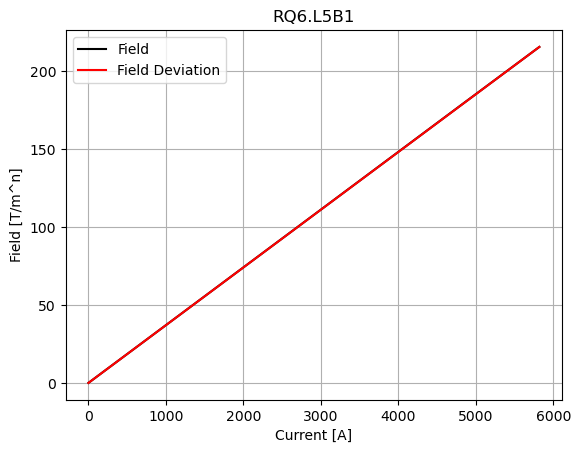

In [37]:
opt.circuits.madname["kq6.l5b1"].plot_calib()

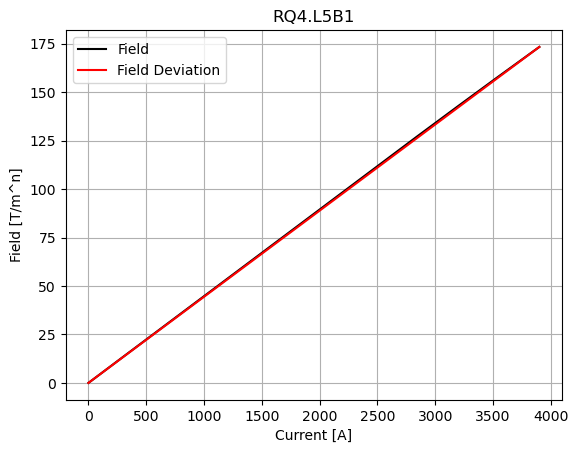

In [38]:
opt.circuits.madname["kq4.l5b1"].plot_calib()

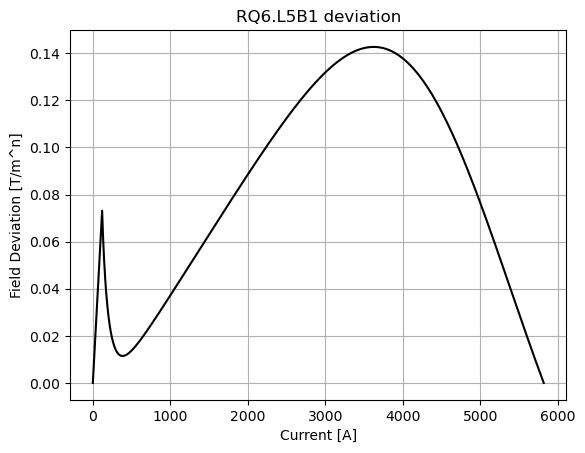

In [39]:
opt.circuits.madname["kq6.l5b1"].plot_calib_deviation()

## Matching

In [40]:
opt.ir5.match()

Target status:                          
id state tag       tol_met       residue   current_val    target_val description                                 
 0 ON    muxip5b1     True  -2.28173e-12        2.6448        2.6448 line=b1, ('mux', 'e.ds.r5.b1'), val=2.64 ...
 1 ON    muxip5b2     True    7.8213e-12        2.6448        2.6448 line=b2, ('mux', 'e.ds.r5.b2'), val=2.64 ...
 2 ON    muyip5b1     True  -1.14264e-12         2.645         2.645 line=b1, ('muy', 'e.ds.r5.b1'), val=2.64 ...
 3 ON    muyip5b2     True  -1.14131e-13         2.645         2.645 line=b2, ('muy', 'e.ds.r5.b2'), val=2.64 ...
 4 ON    e_alfxb1     True   1.16199e-09       2.34552       2.34552 line=b1, ('alfx', 'e.ds.r5.b1'), val=2.3 ...
 5 ON    e_alfyb1     True   4.01184e-11     -0.546151     -0.546151 line=b1, ('alfy', 'e.ds.r5.b1'), val=-0. ...
 6 ON    e_betxb1    False   9.54625e-08       169.503       169.503 line=b1, ('betx', 'e.ds.r5.b1'), val=169 ...
 7 ON    e_betyb1     True  -7.21094e-10       

In [41]:
opt.ir5.params

{'betxip5b1': 2.5,
 'betxip5b2': 2.5,
 'betyip5b1': 2.5,
 'betyip5b2': 2.5,
 'alfxip5b1': -0.0,
 'alfxip5b2': -0.0,
 'alfyip5b1': 0.0,
 'alfyip5b2': 0.0,
 'dxip5b1': -0.0,
 'dxip5b2': 0.0,
 'dpxip5b1': -0.0,
 'dpxip5b2': 0.0,
 'muxip5b1': 2.6448,
 'muxip5b2': 2.6448,
 'muyip5b1': 2.645,
 'muyip5b2': 2.645,
 'muxip5b1_l': 1.17423447,
 'muxip5b2_l': 1.47935904,
 'muyip5b1_l': 1.47638373,
 'muyip5b2_l': 1.17686978,
 'muxip5b1_r': 1.47056553,
 'muxip5b2_r': 1.16544096,
 'muyip5b1_r': 1.16861627,
 'muyip5b2_r': 1.46813022}

In [42]:
opt.ir5.params["betxip5b1"]=2.2
opt.ir5.params["betyip5b1"]=2.2
opt.ir5.params["betxip5b2"]=2.2
opt.ir5.params["betyip5b2"]=2.2

In [43]:
opt.ir5.match()

Target status:                          
id state tag       tol_met       residue   current_val    target_val description                                 
 0 ON    muxip5b1     True  -2.28173e-12        2.6448        2.6448 line=b1, ('mux', 'e.ds.r5.b1'), val=2.64 ...
 1 ON    muxip5b2     True    7.8213e-12        2.6448        2.6448 line=b2, ('mux', 'e.ds.r5.b2'), val=2.64 ...
 2 ON    muyip5b1     True  -1.14264e-12         2.645         2.645 line=b1, ('muy', 'e.ds.r5.b1'), val=2.64 ...
 3 ON    muyip5b2     True  -1.14131e-13         2.645         2.645 line=b2, ('muy', 'e.ds.r5.b2'), val=2.64 ...
 4 ON    e_alfxb1     True   1.16199e-09       2.34552       2.34552 line=b1, ('alfx', 'e.ds.r5.b1'), val=2.3 ...
 5 ON    e_alfyb1     True   4.01184e-11     -0.546151     -0.546151 line=b1, ('alfy', 'e.ds.r5.b1'), val=-0. ...
 6 ON    e_betxb1    False   9.54625e-08       169.503       169.503 line=b1, ('betx', 'e.ds.r5.b1'), val=169 ...
 7 ON    e_betyb1     True  -7.21094e-10       

In [44]:
mtc=opt.ir5.match()

Target status:                          
id state tag       tol_met       residue   current_val    target_val description                                 
 0 ON    muxip5b1     True  -2.28173e-12        2.6448        2.6448 line=b1, ('mux', 'e.ds.r5.b1'), val=2.64 ...
 1 ON    muxip5b2     True    7.8213e-12        2.6448        2.6448 line=b2, ('mux', 'e.ds.r5.b2'), val=2.64 ...
 2 ON    muyip5b1     True  -1.14264e-12         2.645         2.645 line=b1, ('muy', 'e.ds.r5.b1'), val=2.64 ...
 3 ON    muyip5b2     True  -1.14131e-13         2.645         2.645 line=b2, ('muy', 'e.ds.r5.b2'), val=2.64 ...
 4 ON    e_alfxb1     True   1.16199e-09       2.34552       2.34552 line=b1, ('alfx', 'e.ds.r5.b1'), val=2.3 ...
 5 ON    e_alfyb1     True   4.01184e-11     -0.546151     -0.546151 line=b1, ('alfy', 'e.ds.r5.b1'), val=-0. ...
 6 ON    e_betxb1    False   9.54625e-08       169.503       169.503 line=b1, ('betx', 'e.ds.r5.b1'), val=169 ...
 7 ON    e_betyb1     True  -7.21094e-10       

In [45]:
mtc.solve()

Matching: model call n. 228               



In [46]:
mtc.target_status()

Target status:                            
id state tag       tol_met       residue   current_val    target_val description                                 
 0 ON    muxip5b1     True  -6.17995e-12        2.6448        2.6448 line=b1, ('mux', 'e.ds.r5.b1'), val=2.64 ...
 1 ON    muxip5b2     True  -1.43929e-11        2.6448        2.6448 line=b2, ('mux', 'e.ds.r5.b2'), val=2.64 ...
 2 ON    muyip5b1     True  -1.77636e-15         2.645         2.645 line=b1, ('muy', 'e.ds.r5.b1'), val=2.64 ...
 3 ON    muyip5b2     True  -2.66454e-15         2.645         2.645 line=b2, ('muy', 'e.ds.r5.b2'), val=2.64 ...
 4 ON    e_alfxb1     True  -2.69427e-10       2.34552       2.34552 line=b1, ('alfx', 'e.ds.r5.b1'), val=2.3 ...
 5 ON    e_alfyb1     True  -1.11022e-15     -0.546151     -0.546151 line=b1, ('alfy', 'e.ds.r5.b1'), val=-0. ...
 6 ON    e_betxb1     True  -1.85985e-08       169.503       169.503 line=b1, ('betx', 'e.ds.r5.b1'), val=169 ...
 7 ON    e_betyb1     True  -1.07292e-12     

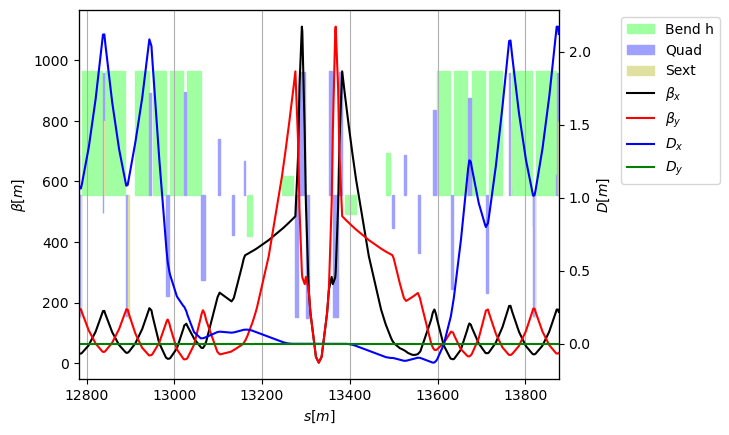

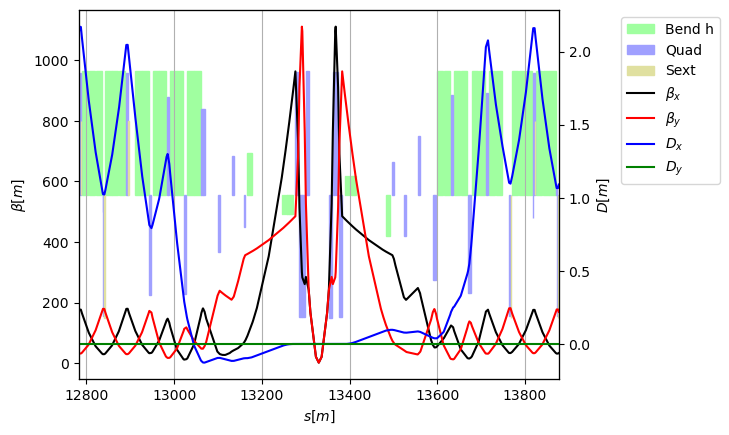

In [47]:
opt.ir5.plot()

In [48]:
opt.check()

name    betx    bety      dx     dpx  px*1e6  py*1e6   x*1e3   y*1e3
ip1   2.5000  2.5000  0.0000 -0.0000  0.0000 -0.0000 -0.0000  0.0000
ip1   2.5000  2.5000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000 -0.0000 -0.0000  0.0000  0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000 -0.0000 -0.0000 -0.0000  0.0000  0.0000 -0.0000
ip5   2.2000  2.2000  0.0000 -0.0000 -0.0000  0.0000 -0.0000 -0.0000
ip5   2.2000  2.2000  0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000
ip8  10.0000 10.0000 -0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000
ip8  10.0000 10.0000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000
         HB1         HB2         VB1         VB2
Tunes:    62.310000   62.310000   60.320000   60.320000
Chroma:   -0.774122   -0.774608   -0.776417   -0.774526


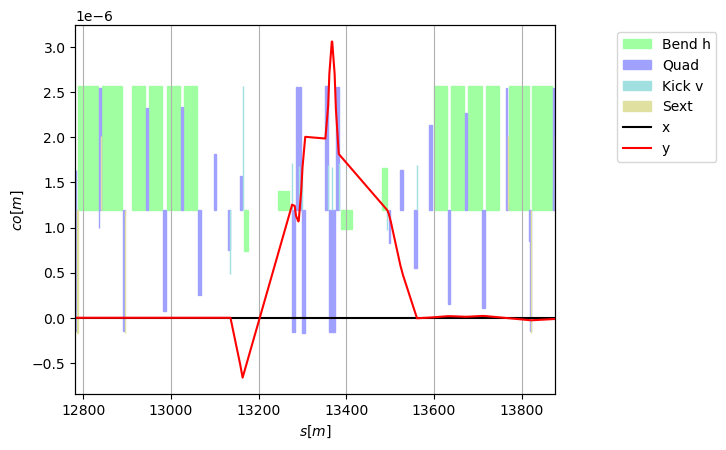

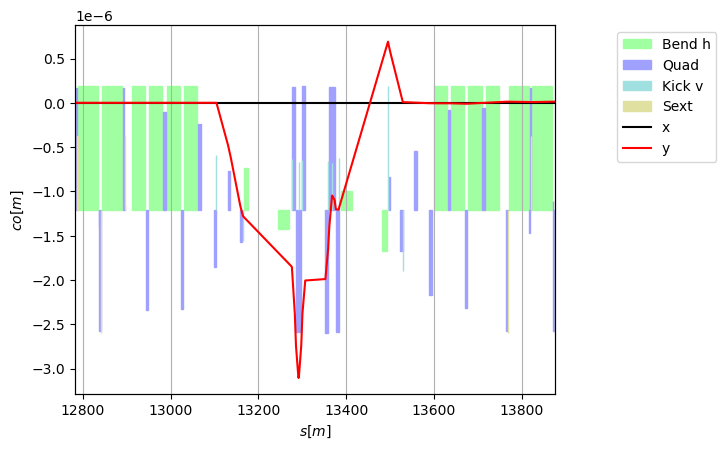

In [49]:
opt.ir5.knobs["on_sep5_v"].plot(0.002)

In [50]:
opt.ir5.knobs["on_sep5_v"].match()

Target status:                          
id state tag tol_met       residue   current_val    target_val description                                 
 0 ON          False  -1.95845e-06   0.000998042         0.001 line=b1, ('y', 'ip5'), val=0.001, tol=1e ...
 1 ON          False   1.42116e-06  -0.000998579        -0.001 line=b2, ('y', 'ip5'), val=-0.001, tol=1 ...
 2 ON          False  -2.03728e-07  -2.03728e-07             0 line=b1, ('py', 'ip5'), val=0, tol=1e-10 ...
 3 ON          False    1.7466e-07    1.7466e-07             0 line=b2, ('py', 'ip5'), val=0, tol=1e-10 ...
 4 ON          False   -6.5565e-06   -6.5565e-06             0 line=b1, ('y', 'e.ds.r5.b1'), val=0, tol ...
 5 ON          False   6.59776e-06   6.59776e-06             0 line=b2, ('y', 'e.ds.r5.b2'), val=0, tol ...
 6 ON          False  -3.62593e-08  -3.62593e-08             0 line=b1, ('py', 'e.ds.r5.b1'), val=0, to ...
 7 ON          False  -1.27748e-07  -1.27748e-07             0 line=b2, ('py', 'e.ds.r5.b2'), v

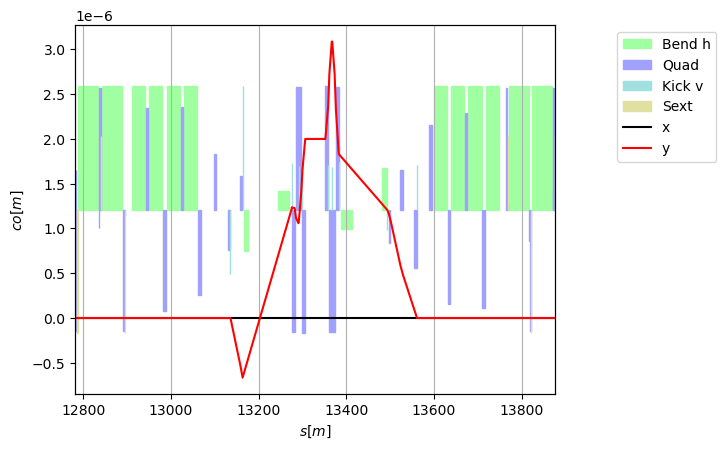

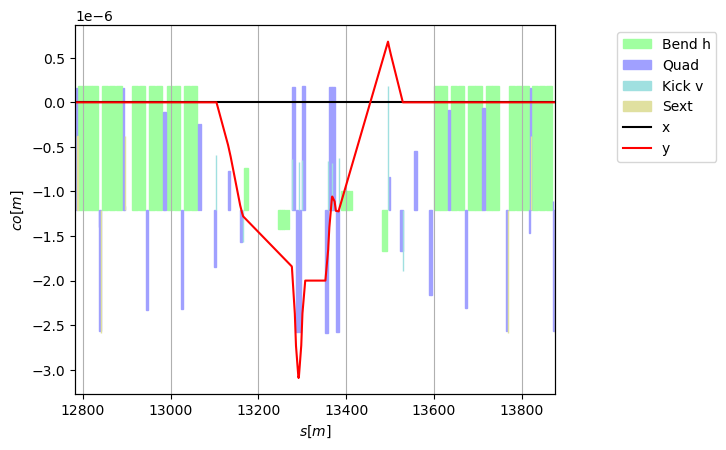

In [51]:
opt.ir5.knobs["on_sep5_v"].plot(0.002)

In [52]:
opt.ir5.knobs["on_sep5_v"].get_mcbx_preset()

(2.4689616797143186e-05, 2.4499435096286023e-05)

Target status:                          
id state tag tol_met       residue   current_val    target_val description                                 
 0 ON          False  -0.000316415   0.000683585         0.001 line=b1, ('y', 'ip5'), val=0.001, tol=1e ...
 1 ON          False   0.000374879  -0.000625121        -0.001 line=b2, ('y', 'ip5'), val=-0.001, tol=1 ...
 2 ON          False  -4.99237e-06  -4.99237e-06             0 line=b1, ('py', 'ip5'), val=0, tol=1e-10 ...
 3 ON          False   1.07915e-05   1.07915e-05             0 line=b2, ('py', 'ip5'), val=0, tol=1e-10 ...
 4 ON          False  -1.19642e-05  -1.19642e-05             0 line=b1, ('y', 'e.ds.r5.b1'), val=0, tol ...
 5 ON          False  -0.000485288  -0.000485288             0 line=b2, ('y', 'e.ds.r5.b2'), val=0, tol ...
 6 ON          False  -7.00271e-06  -7.00271e-06             0 line=b1, ('py', 'e.ds.r5.b1'), val=0, to ...
 7 ON          False   4.49439e-06   4.49439e-06             0 line=b2, ('py', 'e.ds.r5.b2'), v

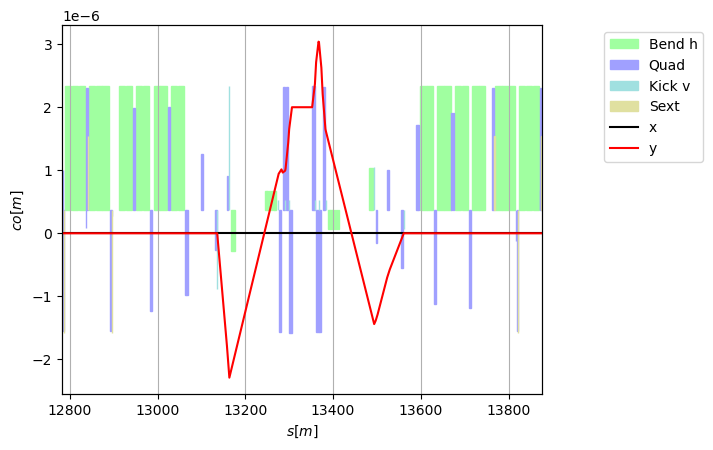

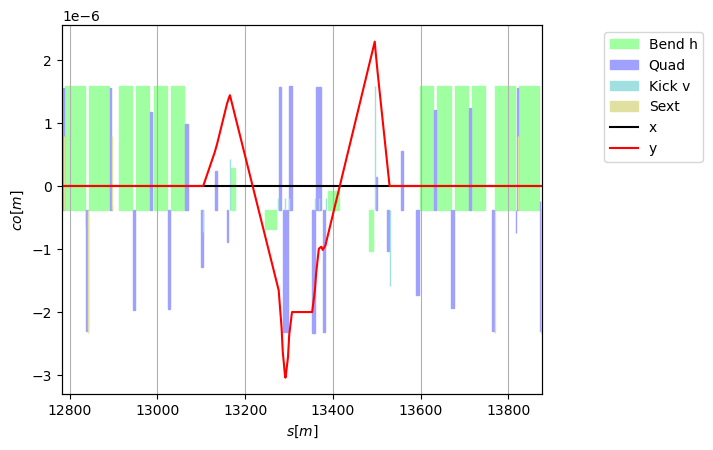

In [53]:
opt.ir5.knobs["on_sep5_v"].set_mcbx_preset(15e-6)
opt.ir5.knobs["on_sep5_v"].const="acbx.*"
opt.ir5.knobs["on_sep5_v"].match()
opt.ir5.knobs["on_sep5_v"].plot(0.002)

In [54]:
opt.check()
opt.update() # get optics from model

name    betx    bety      dx     dpx  px*1e6  py*1e6   x*1e3   y*1e3
ip1   2.5000  2.5000  0.0000 -0.0000  0.0000 -0.0000 -0.0000  0.0000
ip1   2.5000  2.5000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000 -0.0000 -0.0000  0.0000  0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000 -0.0000 -0.0000 -0.0000  0.0000  0.0000 -0.0000
ip5   2.2000  2.2000  0.0000 -0.0000 -0.0000  0.0000 -0.0000 -0.0000
ip5   2.2000  2.2000  0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000
ip8  10.0000 10.0000 -0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000
ip8  10.0000 10.0000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000
         HB1         HB2         VB1         VB2
Tunes:    62.310000   62.310000   60.320000   60.320000
Chroma:   -0.774122   -0.774608   -0.776417   -0.774526


<LHCOptics 'squeezevh_0'>

In [55]:
opt.match_chroma()
opt.match_knobs() #match all known knobs

Set ksf_b1 from ksf1.a12b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a12b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf1.a23b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a23b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf1.a34b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a34b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf1.a45b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a45b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf1.a56b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a56b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf1.a67b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a67b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf1.a78b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a78b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf1.a81b1 to 0.06564828747256604
vars['ksf_b1']
Set ksf_b1 from ksf2.a81b

In [56]:
opt.model["on_sep5_h"]=0.000
opt.check()
opt.model["on_sep5_h"]=0.002
opt.check()
opt.model["on_sep5_h"]=0.000
opt.check()

name    betx    bety      dx     dpx  px*1e6  py*1e6   x*1e3   y*1e3
ip1   2.5000  2.5000  0.0000 -0.0000  0.0000 -0.0000 -0.0000  0.0000
ip1   2.5000  2.5000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000 -0.0000 -0.0000  0.0000  0.0000 -0.0000 -0.0000
ip2  10.0000 10.0000 -0.0000 -0.0000 -0.0000  0.0000  0.0000 -0.0000
ip5   2.2000  2.2000  0.0000 -0.0000 -0.0000  0.0000 -0.0000 -0.0000
ip5   2.2000  2.2000  0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000
ip8  10.0000 10.0000 -0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000
ip8  10.0000 10.0000 -0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000
         HB1         HB2         VB1         VB2
Tunes:    62.310000   62.310000   60.320000   60.320000
Chroma:   -0.000001    0.000000    0.000000    0.000000
name    betx    bety      dx     dpx  px*1e6  py*1e6   x*1e3   y*1e3
ip1   2.5000  2.5000  0.0000  0.0000  0.0000 -0.0000 -0.0000  0.0000
ip1   2.5000  2.5000  0.0000  0.0000  0.0000 -0.0000 -0.0000  0.0000
ip2  10.000

## To MAD-X and OP

In [57]:
opt.to_madx()

! SQUEEZEVH_0

! Main Parameters
p0c                            = 6800000000000.0000000000000000;
qxb1                           = 62.3100000015436706;
qyb1                           = 60.3199999923588450;
qxb2                           = 62.3099999953596821;
qyb2                           = 60.3199999933122797;
qpxb1                          = -0.7741217960699487;
qpyb1                          = -0.7764170563007156;
qpxb2                          = -0.7746084085624716;
qpyb2                          = -0.7745264064595858;
match_inj                      =  0.0000000000000000;
rx_ip1                         =  1.0000000000000000;
ry_ip1                         =  1.0000000000000000;
rx_ip5                         =  1.0000000000000000;
ry_ip5                         =  1.0000000000000000;

! IR1

! Strengths of IR1
kqx.l1                         =    0.008496131499484852;
kqx.r1                         =   -0.008496131499484852;
ktqx1.l1                       =  -6.889898423011464e-06;

In [58]:
opt.to_madx("test.madx")

from cpymad.madx import Madx
madx=Madx()
madx.option(echo=False,warn=False)
madx.call("acc-models-lhc/lhc.seq")
madx.call("test.madx")
madx.beam(particle="proton",energy=6800,bv=1,sequence="lhcb1")
madx.use("lhcb1")
madx.twiss(chrom=True)
madx.value("table(twiss,ip5,betx)")
madx.value("table(twiss,ip5,bety)")
madx.globals["on_sep5_v"]=0.002
madx.twiss(chrom=True)
madx.value("table(twiss,ip5,y)")
madx.value("table(twiss,ip5,py)")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.02  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.18               +
  + Execution date: 2024.09.24 12:54:13      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   5.779013E-12 deltap:   1.000000E-06
orbit:  -2.082707E-12  1.260338E-12  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
        26658.8832                 -0    0.0003453923037        53.80760626 

                q1                dq1            betxmax              dxmax 
             62.31      -0.7738203965        1110.875985        2.801876743 

             dxrms             xcomax             xcorms 

True

## Optics Transitions

In [59]:
opt.update("squeezevh/v2/squeeze_0_knobs.json").update_model()

<LHCOptics 'squeezevh_0'>

In [60]:
tab=opt.copy().to_table()
for ii in range(1,21):
    tab.append(opt.copy().update(f"squeezevh/v2/squeeze_{ii}_knobs.json"))

In [61]:
tab

<Table LHCOptics: 21 rows>

In [62]:
tab.ir4

<Table LHCIR4: 21 rows>

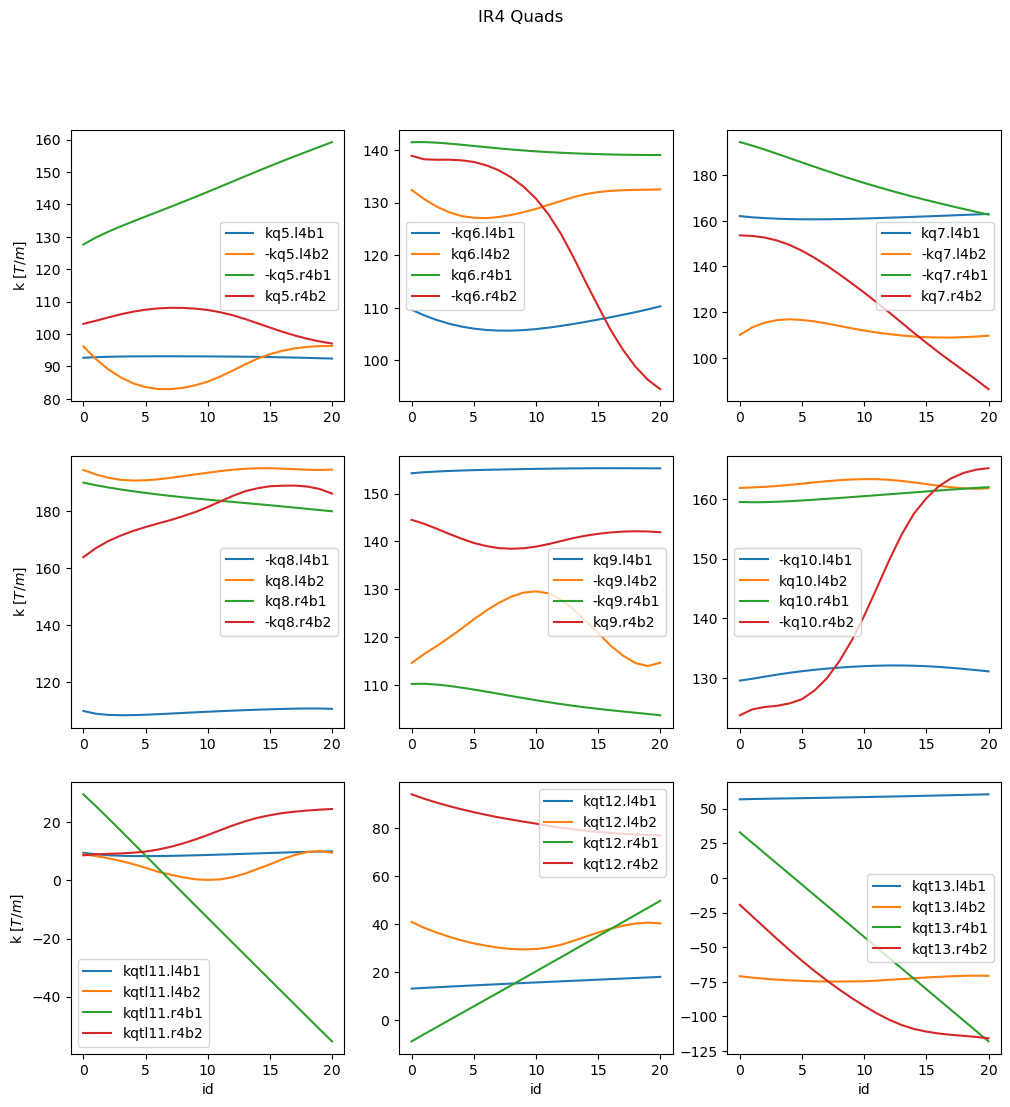

In [63]:
tab.ir4.plot_quads()

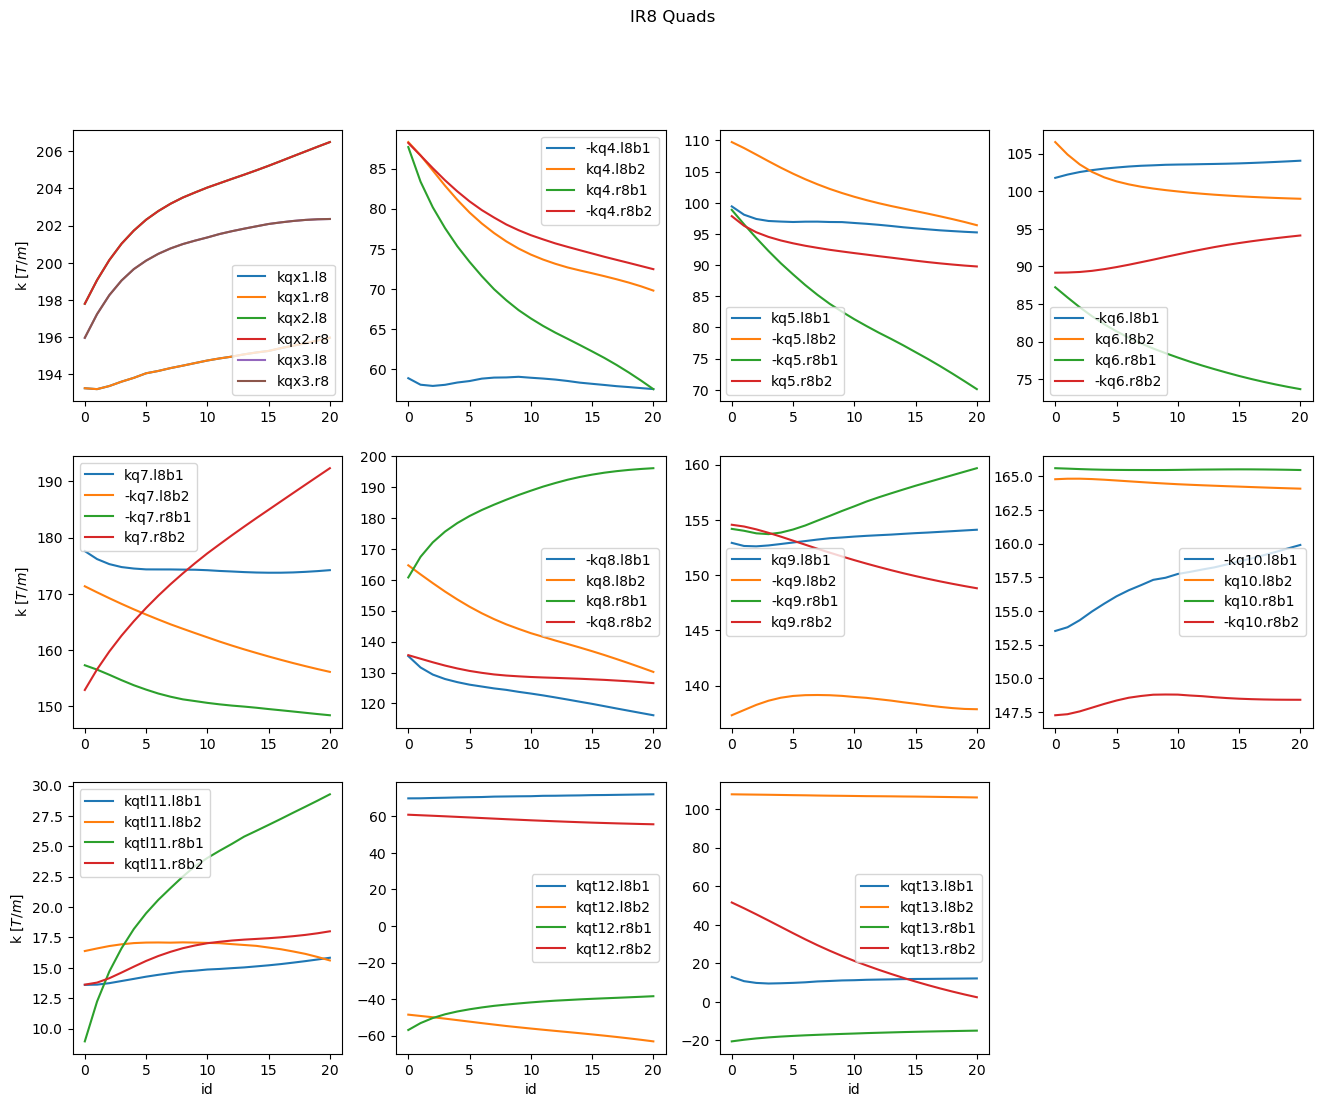

In [64]:
tab.ir8.plot_quads()

residuals kqtl11.l8b1 9.159724579003038e-06
residuals kqtl11.l8b2 4.720262169038655e-05
residuals kqtl11.r8b1 0.0002445637552683583
residuals kqtl11.r8b2 5.51056125712645e-05


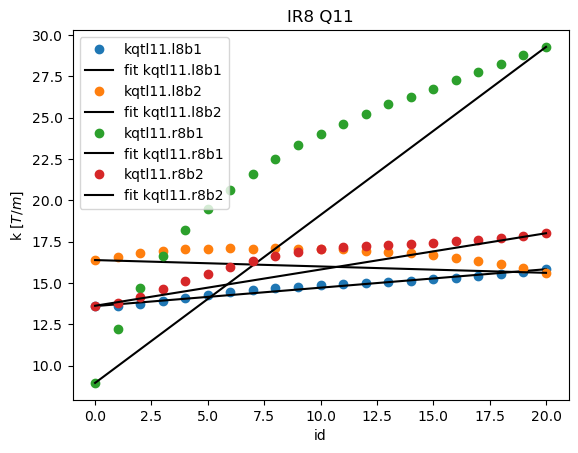

In [65]:
tab.ir8.plot_quad_fit(11,1)

residuals kqtl11.l8b1 7.0633002424589026e-06
residuals kqtl11.l8b2 4.169711732644873e-06
residuals kqtl11.r8b1 3.0276661811266142e-05
residuals kqtl11.r8b2 1.632664521190462e-05


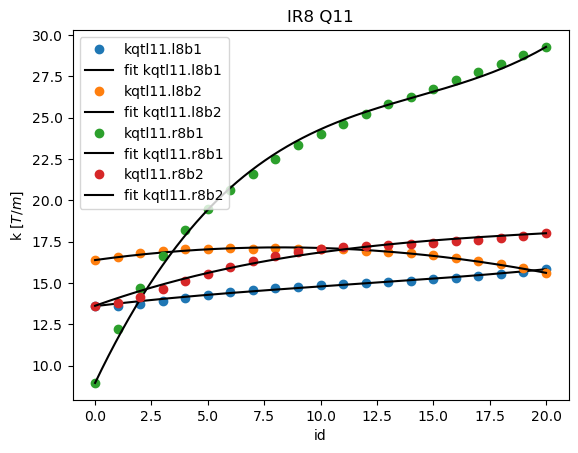

In [66]:
tab.ir8.plot_quad_fit(11,3)

residuals kqtl11.l8b1 6.046779213581249e-07
residuals kqtl11.l8b2 1.423191763422595e-06
residuals kqtl11.r8b1 5.503830981977908e-06
residuals kqtl11.r8b2 1.3814756603957885e-06


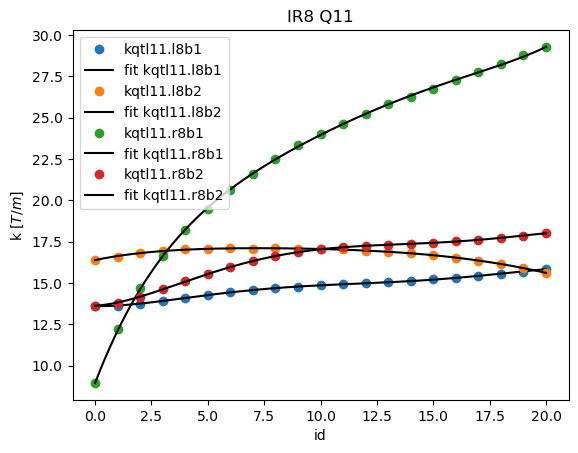

In [67]:
tab.ir8.plot_quad_fit(11,5)